# 1 Подключение библиотек и чтение файла

In [1]:
#Подключение библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import scipy.stats as ss
pd.set_option('display.max_columns',50)
#Считывание .csv файла
stud_math=pd.read_csv(
    '/home/stormrider/Desktop/Python/Stud_math/stud_math.csv')
display(stud_math.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


# 2 Информация о датафрейме.

In [2]:
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                 395 non-null object
sex                    395 non-null object
age                    395 non-null int64
address                378 non-null object
famsize                368 non-null object
Pstatus                350 non-null object
Medu                   392 non-null float64
Fedu                   371 non-null float64
Mjob                   376 non-null object
Fjob                   359 non-null object
reason                 378 non-null object
guardian               364 non-null object
traveltime             367 non-null float64
studytime              388 non-null float64
failures               373 non-null float64
schoolsup              386 non-null object
famsup                 356 non-null object
paid                   355 non-null object
activities             381 non-null object
nursery                379 non-null object
studytime, granular    388 non-

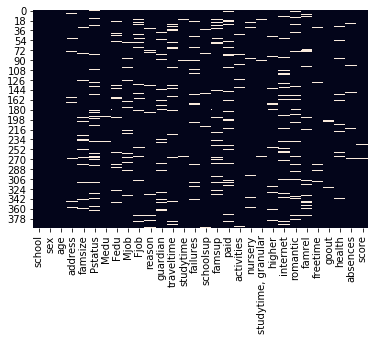

In [3]:
sns.heatmap(data=stud_math.isnull(), cbar=False)

## Как видно из тепловой карты - в датасете большое количество пропущенных значений. Удаление пропущенных значений приведет к существенному сокращению выборки.
## Выведем списки уникальных значений по каждому параметру:

In [4]:
for column in stud_math.columns:
    print(column,
          stud_math.loc[:,column].unique())

school ['GP' 'MS']
sex ['F' 'M']
age [18 17 15 16 19 22 20 21]
address ['U' nan 'R']
famsize [nan 'GT3' 'LE3']
Pstatus ['A' nan 'T']
Medu [ 4.  1.  3.  2. nan  0.]
Fedu [ 4.  1.  2.  3. 40. nan  0.]
Mjob ['at_home' 'health' 'other' 'services' 'teacher' nan]
Fjob ['teacher' 'other' nan 'health' 'services' 'at_home']
reason ['course' 'other' 'home' 'reputation' nan]
guardian ['mother' 'father' 'other' nan]
traveltime [ 2.  1.  3. nan  4.]
studytime [ 2.  3.  1. nan  4.]
failures [ 0.  3. nan  2.  1.]
schoolsup ['yes' 'no' nan]
famsup ['no' 'yes' nan]
paid ['no' nan 'yes']
activities ['no' 'yes' nan]
nursery ['yes' 'no' nan]
studytime, granular [ -6.  -9.  -3.  nan -12.]
higher ['yes' nan 'no']
internet [nan 'yes' 'no']
romantic ['no' nan 'yes']
famrel [ 4.  5.  3. nan -1.  2.  1.]
freetime [ 3.  2.  4.  1.  5. nan]
goout [ 4.  3.  2.  1.  5. nan]
health [ 3.  5.  1.  2.  4. nan]
absences [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.

## Можно сделать следующие выводы:
## - Параметр Fedu имеет значение 40.0. По условию параметр является категориальным и принимает значения из списка [0,1,2,3,4];
## - параметр failures имеет значение 0. По условию параметр является категориальным и принимает значения из списка [1,2,3,4];
## - параметр famrel имеет значение -1. По условию параметр является категориальным и принимает значения из списка [1,2,3,4,5];
## - параметр absences имеет значения 385 и 212. Данные значения сильно выделяются на фоне остальной выборки и скорее всего являются ошибками;
## - параметр score имеет значение 0. Можно предположить, что нулевое количество баллов означает неявку или удаление с экзамена.

# 3 Первичная обработка данных

## Приведем к числовому формату категориальные параметры для дальнейшей работы:

In [5]:
#Замена 'yes' и 'no' на 1 и 0
for column in ['schoolsup','famsup',
               'paid','activities',
               'nursery','higher',
               'internet','romantic']:
    stud_math[column]=stud_math[column].apply(lambda x:0 if x=='no'
                                              else 1 if x=='yes'
                                              else x)
    
    
#Меняем наименование параметра 'Pstatus' на 'p_together'
#и приводим к числовому виду
stud_math.Pstatus=stud_math.Pstatus.apply(lambda x: 1 if x=='T'
                                          else 0 if x=='A'
                                          else x)

stud_math.rename(columns={'Pstatus': 'p_together'}, inplace=True)



#Меняем наименование параметра 'famsize' на 'famsize_GT3'
#и приводим к числовому виду
stud_math.famsize=stud_math.famsize.apply(lambda x: 1 if x=='GT3'
                                          else 0 if x=='LE3'
                                          else x)

stud_math.rename(columns={'famsize': 'famsize_GT3'}, inplace=True)


#Меняем наименование параметра 'address' на 'city_dweller'
#и приводим к числовому виду
stud_math.address=stud_math.address.apply(lambda x: 1 if x=='U'
                                          else 0 if x=='R'
                                          else x)

stud_math.rename(columns={'address': 'city_dweller'}, inplace=True)


#Приводим параметр school к числовому виду
stud_math.school=stud_math.school.apply(lambda x: 1 if x=='GP'
                                        else 0 if x=='MS'
                                        else x)


#Приводим параметры Mjob и Fjob к числовому формату
for column in ['Mjob','Fjob']:
    stud_math[column]=stud_math[column].apply(lambda x: 0 if x=='teacher'
                                              else 1 if x=='health'
                                              else 2 if x=='services'
                                              else 3 if x=='at_home'
                                              else 4 if x=='other'
                                              else x)
stud_math.reason=stud_math.reason.apply(lambda x: 0 if x=='home'
                                              else 1 if x=='reputation'
                                              else 2 if x=='course'
                                              else 3 if x=='other'
                                              else x)
stud_math.guardian=stud_math.guardian.apply(lambda x: 0 if x=='mother'
                                              else 1 if x=='father'
                                              else 2 if x=='other'
                                              else x)

## Функции

In [6]:
def null_count(column):
    """Вывод информации о количестве пропущенных значений"""
    
    
    print('Кол-во наблюдений:',column.isnull().count(),'\n',
          'Кол-во значений:','\n',column.value_counts(),'\n',
          'Кол-во пропущенных значений:',column.isnull().sum(),'\n',
          'Пропорция пропущенных значений:',
          round(column.isnull().sum()/column.isnull().count(),2))
    
    
def get_boxplot(column):
    """Построение boxplot"""
    
    
    fig,ax=plt.subplots(figsize=(14,4))
    sns.boxplot(x=column,y='score',
                data=stud_math,
                ax=ax)
    ax.set_title('Boxplot for '+column)
    plt.show()

# 3.1 city_dweller

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    295
0.0     83
Name: city_dweller, dtype: int64 
 Кол-во пропущенных значений: 17 
 Пропорция пропущенных значений: 0.04


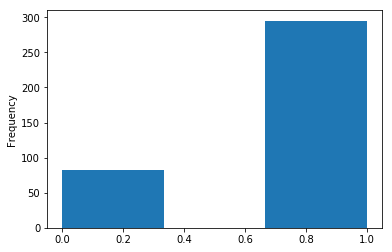

In [7]:
null_count(stud_math.city_dweller)
stud_math.city_dweller.plot(kind='hist',bins=3)

### Как видно из гистаграммы, количество жителей города составляет значительную часть от их общего количества. При этом количество пропущенных значений составляет всего 4% от общего количества наблюдений.Попробуем установить зависимость со временем, затрачиваемым на дорогу, и школой.

In [8]:
null_count(stud_math.traveltime)

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64 
 Кол-во пропущенных значений: 28 
 Пропорция пропущенных значений: 0.07


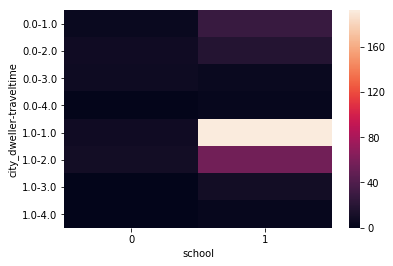

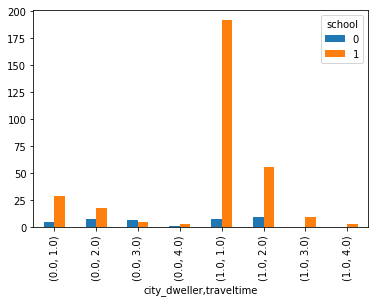

In [9]:
ct=pd.crosstab([stud_math.city_dweller,stud_math.traveltime],
               stud_math.school)
sns.heatmap(ct)
ct.plot(kind='bar')

### Как видно по тепловой карте и гистограмме, большее количество учащихся затрачивает менее 30 минут на дорогу, живут в городе, учатся в школе 1. Заменим нулевые значения параметра city_dweller на 1, если значение school равно 1, случайным значением 0 или 1, если значение school равно 0. 

In [10]:
def city_d(city_dweller,school):
    """Функция замены пропущенных значений"""
    
    
    if city_dweller!=0 and city_dweller!=1:
        if school==1:
            return 1
        else:
            return np.random.choice([0,1])
    else:
        return city_dweller
    
    
stud_math.city_dweller=stud_math.apply(
    lambda x: city_d(x.city_dweller,x.school), axis=1)

## Распределение баллов в зависимости от места жительства.

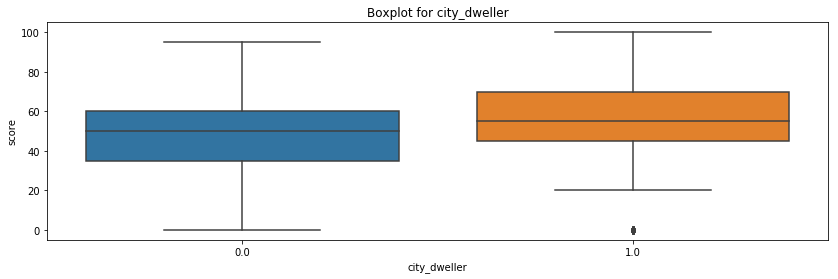

In [11]:
get_boxplot('city_dweller')

### Из графика видно, что баллы у городских жителей в целом выше. В правой части графика имеется выброс в виде нулевого значения баллов.

# 3.2 traveltime

## Заполним пропущенные значения случайным значением 1 или 2, т.к. большинство учеников добираются до учебного заведения не более 30 минут.

In [12]:
stud_math.traveltime=stud_math.traveltime.apply(lambda x: np.random.choice([1,2]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от времени, затрачиваемого на дорогу.

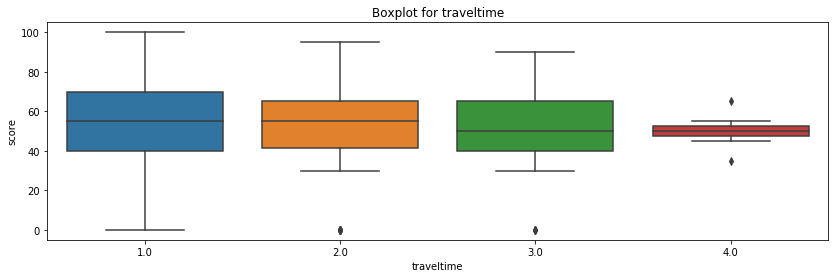

In [13]:
get_boxplot('traveltime')

### Из графика можно сделать вывод, что в среднем баллы выше у тех, кто затрачивает меньше времени на дорогу. Имеются выбросы в виде нулевых значений баллов. В правой части графика имеются выбросы, отличные от нуля. Наличие выбросов предполагает, что разброс значений баллов уменьшается при увеличении времени, затрачиваемого на дорогу.


# 3.3 higher

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    356
0.0     19
Name: higher, dtype: int64 
 Кол-во пропущенных значений: 20 
 Пропорция пропущенных значений: 0.05


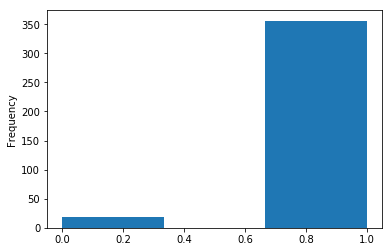

In [14]:
null_count(stud_math.higher)
stud_math.higher.plot(kind='hist', bins=3)

### Как видно из гистаграммы, количество  учеников, жедающих получить образование существенно больше. При этом количество пропущенных значений составляет  5% от общего количества наблюдений. Заменим отсутствующие значения самым популярным.

In [15]:
stud_math.higher=stud_math.higher.apply(lambda x: 1 if pd.isnull(x) else x)

## Распределение баллов в зависимости от желания получить высшее образование.

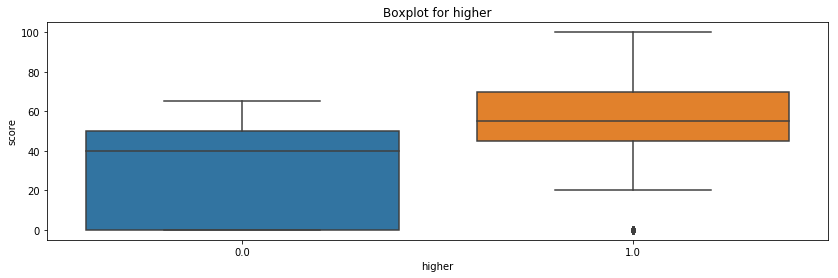

In [16]:
get_boxplot('higher')

### Из графика можно сделать вывод, что баллы значительно выше у тех, кто желает получить высшее образование. Имеются выбросы в виде нулевых значений баллов в правой части графика.

# 3.4 Medu и Fedu

Кол-во наблюдений: 395 
 Кол-во значений: 
 4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64 
 Кол-во пропущенных значений: 3 
 Пропорция пропущенных значений: 0.01


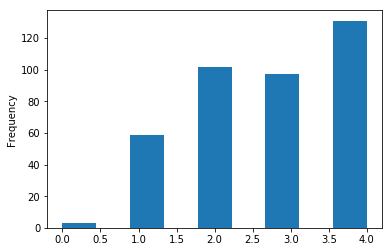

In [17]:
null_count(stud_math.Medu)
stud_math.Medu.plot(kind='hist', bins=9)

### Как видно из гистаграммы, количество  учеников растет с увеличением уровня образования матерей. При этом количество пропущенных значений составляет  1% от общего количества наблюдений. Заменим отсутствующие значения самым популярным.

In [18]:
stud_math.Medu=stud_math.Medu.apply(lambda x: 4 if pd.isnull(x) else x)

## Распределение баллов в зависимости от уровня образования матери.

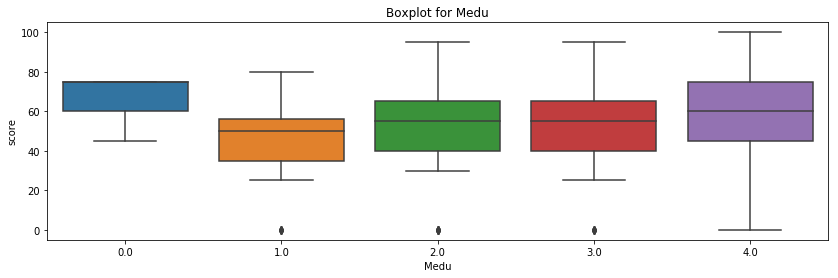

In [19]:
get_boxplot('Medu')

### Из графика видно, что среднее количество баллов растет с ростом уровня образования матери, начиная с 1-го. При этом заметно, что уровень баллов учеников с матерями, не имеющими образования, довольно высокий. Возможно, стоит вынести отсутсвие образования в отдельный параметр.

In [20]:
null_count(stud_math.Fedu)

Кол-во наблюдений: 395 
 Кол-во значений: 
 2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64 
 Кол-во пропущенных значений: 24 
 Пропорция пропущенных значений: 0.06


## Уберем выброс со значением 40.

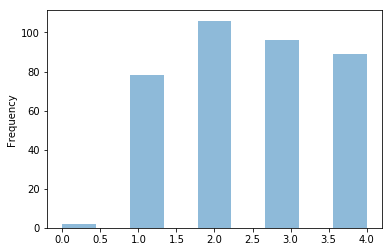

In [21]:
stud_math.Fedu=stud_math.Fedu.apply(lambda x: 4 if x==40 else x)
stud_math.Fedu.plot(kind='hist', bins=9, alpha=0.5)

### Количество  учеников, отцы которых имеют образование, распределено примерно в равных пропорциях. При этом количество пропущенных значений составляет  6% от общего количества наблюдений. Заменим отсутствующие значения случайными [1,2,3,4].

In [22]:
stud_math.Fedu=stud_math.Fedu.apply(
    lambda x: np.random.choice([1,2,3,4]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от уровня образования отца

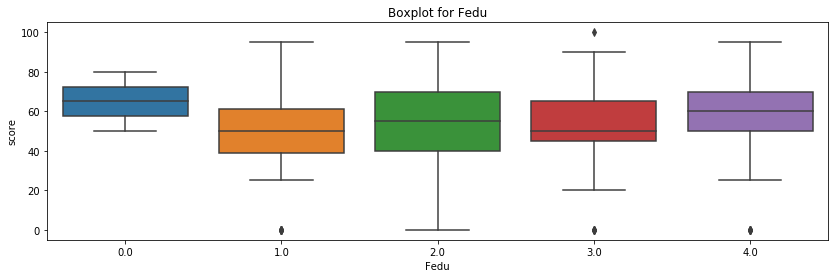

In [23]:
get_boxplot('Fedu')

### Из графика видно, что среднее количество баллов увеличивается с ростом уровня образования отца. При этом заметно, что уровень количества баллов учеников с отцами, не имеющими образования, довольно высокий. Возможно, стоит вынести отсутсвие образование в отдельный параметр.

# 3.5 Mjob и Fjob
## 0 - teacher
## 1 - health
## 2 - services
## 3 - at_home
## 4 - other

Кол-во наблюдений: 395 
 Кол-во значений: 
 4.0    133
2.0     98
3.0     58
0.0     55
1.0     32
Name: Mjob, dtype: int64 
 Кол-во пропущенных значений: 19 
 Пропорция пропущенных значений: 0.05


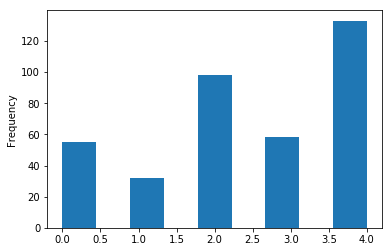

In [24]:
null_count(stud_math.Mjob)
stud_math.Mjob.plot(kind='hist', bins=9)

### Количество пропущенных значений составляет  5% от общего количества наблюдений. Заменим отсутствующие значения случайными [2,4].

In [25]:
stud_math.Mjob=stud_math.Mjob.apply(
    lambda x: np.random.choice([2,4]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от места работы матери.

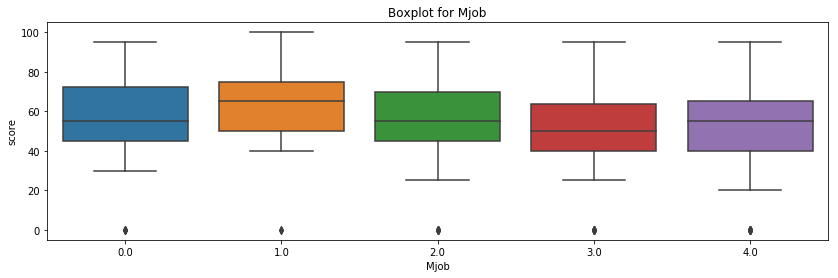

In [26]:
get_boxplot('Mjob')

### Уровень количества баллов самый высокий у учеников, матери которых работают в сфере здравоохранения. Самый низкий - у безработных.

Кол-во наблюдений: 395 
 Кол-во значений: 
 4.0    197
2.0    102
0.0     29
3.0     16
1.0     15
Name: Fjob, dtype: int64 
 Кол-во пропущенных значений: 36 
 Пропорция пропущенных значений: 0.09


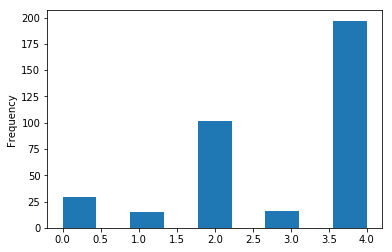

In [27]:
null_count(stud_math.Fjob)
stud_math.Fjob.plot(kind='hist', bins=9)

### Количество пропущенных значений составляет  9% от общего количества наблюдений. Заменим отсутствующие значения случайными [2,4].

In [28]:
stud_math.Fjob=stud_math.Fjob.apply(
    lambda x: np.random.choice([2,4]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от места работы отца.

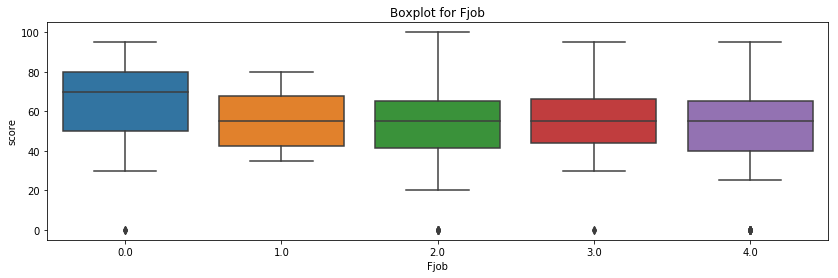

In [29]:
get_boxplot('Fjob')

### Уровень количества баллов слабо зависит от места работы отца ученика, за исключением работы учителем.

# 3.6 famsize_GT3

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    261
0.0    107
Name: famsize_GT3, dtype: int64 
 Кол-во пропущенных значений: 27 
 Пропорция пропущенных значений: 0.07


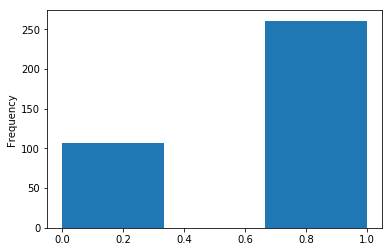

In [30]:
null_count(stud_math.famsize_GT3)
stud_math.famsize_GT3.plot(kind='hist', bins=3)

### Количество  учеников, живущих в больших семьях, в 2,5 раза больше количества учеников, живущих в маленьких семьях. При этом количество пропущенных значений составляет  7% от общего количества наблюдений.
### Заменим отсутствующие значения единицей.

In [31]:
stud_math.famsize_GT3=stud_math.famsize_GT3.apply(
    lambda x: 1 if pd.isnull(x) else x)

## Распределение баллов в зависимости от размера семьи.

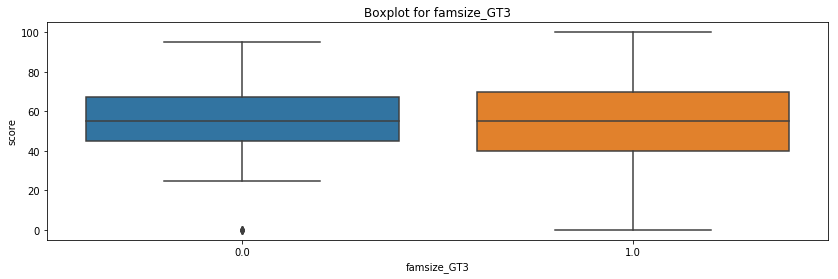

In [32]:
get_boxplot('famsize_GT3')

## Уровень количества баллов слабо зависит от размера семьи ученика.

# 3.7 reason
## 0 - home
## 1 - reputation
## 2 - course
## 3 - other

Кол-во наблюдений: 395 
 Кол-во значений: 
 2.0    137
0.0    104
1.0    103
3.0     34
Name: reason, dtype: int64 
 Кол-во пропущенных значений: 17 
 Пропорция пропущенных значений: 0.04


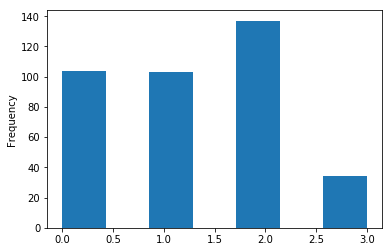

In [33]:
null_count(stud_math.reason)
stud_math.reason.plot(kind='hist', bins=7)

### На графике видно, что самой частой причиной выбора школы является репутация. С небольшим отставанием распределены расстояние до дома и репутация. При этом количество пропущенных значений составляет  4% от общего количества наблюдений. Отсутсвующие значения заменим случайными величинами 0, 1 или 2.

In [34]:
stud_math.reason=stud_math.reason.apply(
    lambda x: np.random.choice([0,1,2]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от причины выбора школы.

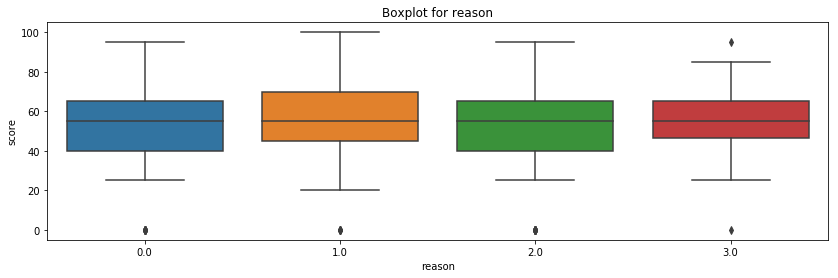

In [35]:
get_boxplot('reason')

### Из графиков видно, что причина выбора школы не сильно влияет на распределение количества баллов.

# 3.8 guardian
## 0 - mother
## 1 - father
## 2 - other

Кол-во наблюдений: 395 
 Кол-во значений: 
 0.0    250
1.0     86
2.0     28
Name: guardian, dtype: int64 
 Кол-во пропущенных значений: 31 
 Пропорция пропущенных значений: 0.08


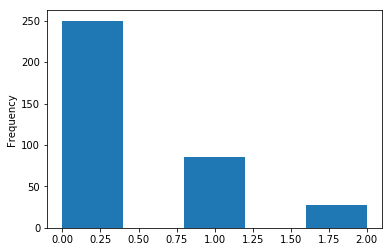

In [36]:
null_count(stud_math.guardian)
stud_math.guardian.plot(kind='hist', bins=5)

### На графике видно, что чаще всего в роли опекуна выступает мать. При этом количество пропущенных значений составляет  8% от общего количества наблюдений. Отсутсвующие значения заменим заменим значением 0.

In [37]:
stud_math.guardian=stud_math.guardian.apply(
    lambda x: 0 if pd.isnull(x) else x)

## Распределение баллов в зависимости от того, кто является опекуном ученика.

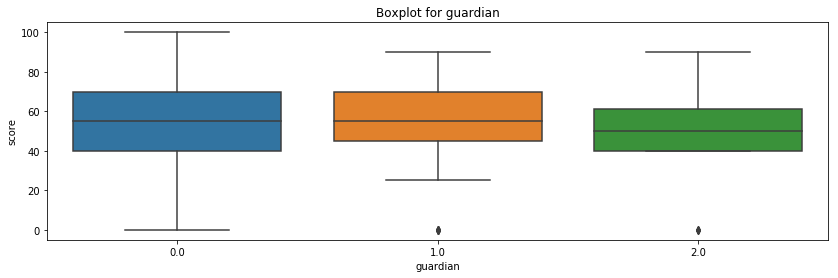

In [38]:
get_boxplot('guardian')

### Можно сделать вывод, что ученики, опекунами которых являются мать или отец, в среднем набрали более высокое количество баллов.

# 3.9 studytime
## 0 - n < 2 hours
## 1 - 2 hours < n < 5 hours
## 2 - 5 hours < n < 10 hours
## 3 - n > 10 hours

Кол-во наблюдений: 395 
 Кол-во значений: 
 2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64 
 Кол-во пропущенных значений: 7 
 Пропорция пропущенных значений: 0.02


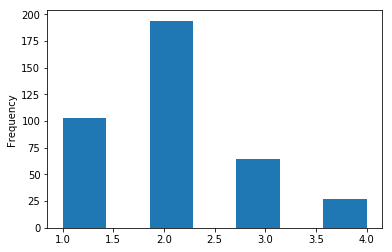

In [39]:
null_count(stud_math.studytime)
stud_math.studytime.plot(kind='hist', bins=7)

### Большинство учеников учатся помимо школы от 2 до 5 часов. При этом количество пропущенных значений составляет  2% от общего количества наблюдений. Отсутсвующие значения заменим значением 2.

In [40]:
stud_math.studytime=stud_math.studytime.apply(
    lambda x: 2 if pd.isnull(x) else x)

## Распределение баллов в зависимости от затраченного на учебу вне школы времени.

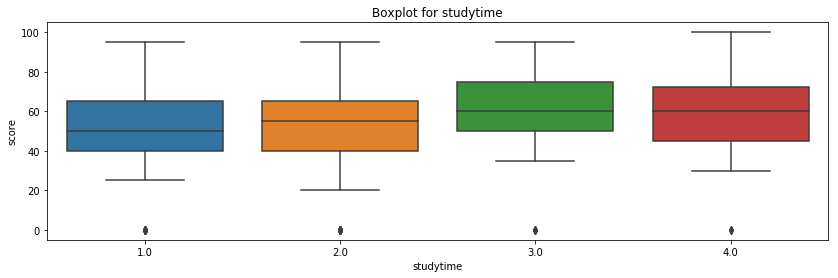

In [41]:
get_boxplot('studytime')

### Из графика видно, что количество баллов увеличивается от завтраченного на учебу времени

# 3.10 schoolsup

Кол-во наблюдений: 395 
 Кол-во значений: 
 0.0    335
1.0     51
Name: schoolsup, dtype: int64 
 Кол-во пропущенных значений: 9 
 Пропорция пропущенных значений: 0.02


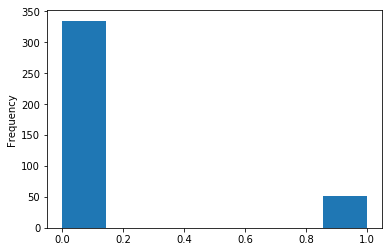

In [42]:
null_count(stud_math.schoolsup)
stud_math.schoolsup.plot(kind='hist', bins=7)

### Большинство учеников не имеет школьной поддержки. При этом количество пропущенных значений составляет  2% от общего количества наблюдений. Отсутсвующие значения заменим значением 0.

In [43]:
stud_math.schoolsup=stud_math.schoolsup.apply(
    lambda x: 0 if pd.isnull(x) else x)

## Распределение баллов в зависимости от наличия школьной поддержки.

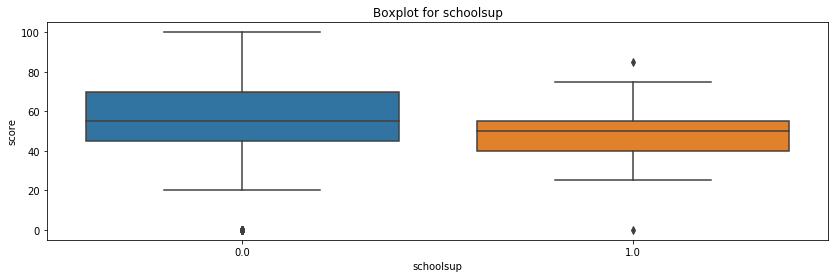

In [44]:
get_boxplot('schoolsup')

### Ученики, получающие школьную поддержку, набрали в среднем меньшее количество баллов.

# 3.11 famsup

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    219
0.0    137
Name: famsup, dtype: int64 
 Кол-во пропущенных значений: 39 
 Пропорция пропущенных значений: 0.1


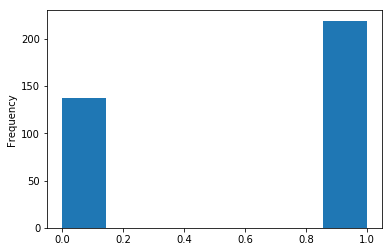

In [45]:
null_count(stud_math.famsup)
stud_math.famsup.plot(kind='hist', bins=7)

### Большинство учеников имеют поддержку семьи. При этом количество пропущенных значений составляет  10% от общего количества наблюдений. Отсутсвующие значения заменим случайной величиной 0 или 1.

In [46]:
stud_math.famsup=stud_math.famsup.apply(
    lambda x: np.random.choice([0,1]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от наличия семейной поддержки.

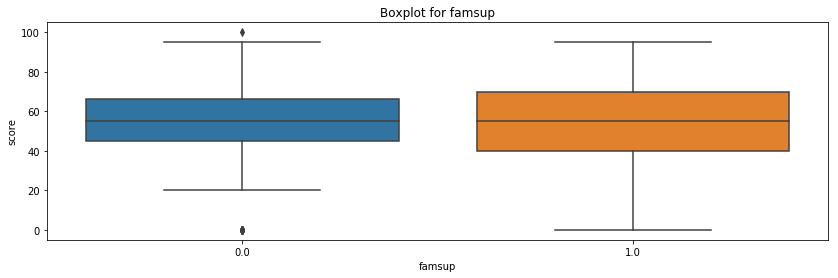

In [47]:
get_boxplot('famsup')

### Наличие семейной поддержки не влияет на количество полученных баллов.

# 3.12 paid

Кол-во наблюдений: 395 
 Кол-во значений: 
 0.0    200
1.0    155
Name: paid, dtype: int64 
 Кол-во пропущенных значений: 40 
 Пропорция пропущенных значений: 0.1


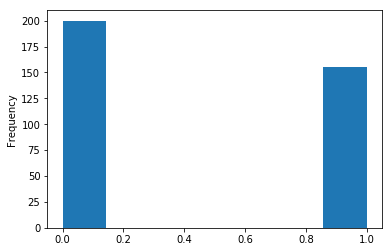

In [48]:
null_count(stud_math.paid)
stud_math.paid.plot(kind='hist', bins=7)

### Большинство учеников ходят на платные занятия по математике. При этом количество пропущенных значений составляет  10% от общего количества наблюдений. Отсутсвующие значения заменим случайной величиной 0 или 1.

In [49]:
stud_math.paid=stud_math.paid.apply(
    lambda x: np.random.choice([0,1]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от наличия платных занятий по математике.

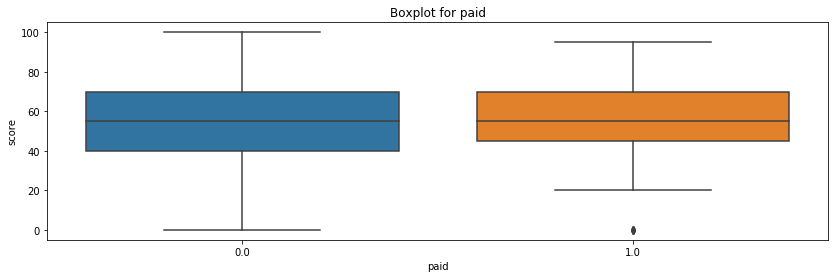

In [50]:
get_boxplot('paid')

### Наличие платных занятий не влияет на количество полученных баллов.

# 3.12 activities

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    195
0.0    186
Name: activities, dtype: int64 
 Кол-во пропущенных значений: 14 
 Пропорция пропущенных значений: 0.04


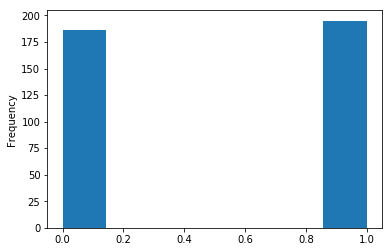

In [51]:
null_count(stud_math.activities)
stud_math.activities.plot(kind='hist', bins=7)

### Количество учеников, посещающих и непосещающих дополнительные учебные занятия, распределено примерно поровну. При этом количество пропущенных значений составляет  4% от общего количества наблюдений. Отсутсвующие значения заменим случайными величинами 0 или 1.

In [52]:
stud_math.activities=stud_math.activities.apply(
    lambda x: np.random.choice([0,1]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от наличия дополнительных учебных занятий.

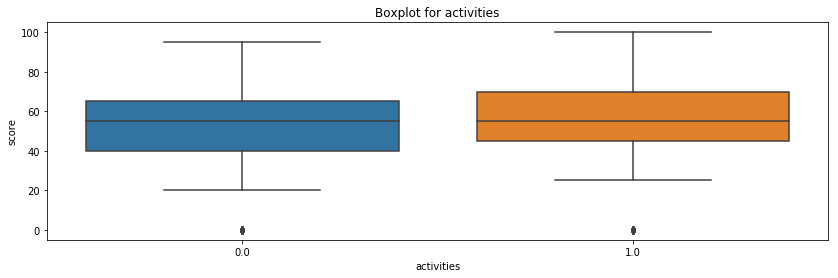

In [53]:
get_boxplot('activities')

### Наличие дополнительных учебных занятий не влияет на количество полученных баллов.

# 3.13 nursery

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    300
0.0     79
Name: nursery, dtype: int64 
 Кол-во пропущенных значений: 16 
 Пропорция пропущенных значений: 0.04


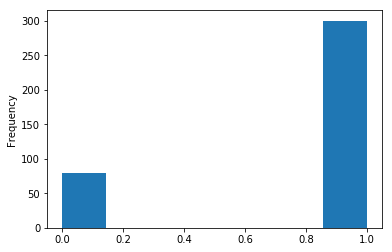

In [54]:
null_count(stud_math.nursery)
stud_math.nursery.plot(kind='hist', bins=7)

### Большинство из учеников посещали детский сад. При этом количество пропущенных значений составляет  4% от общего количества наблюдений. Отсутсвующие значения заменим величиной 1.

In [55]:
stud_math.nursery=stud_math.nursery.apply(
    lambda x: 1 if pd.isnull(x) else x)

## Распределение баллов в зависимости от посещения детского сада.

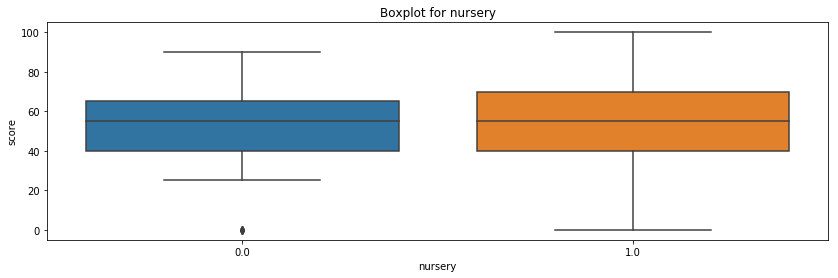

In [56]:
get_boxplot('nursery')

### Посещение детского сада не влияет на количество полученных баллов.

# 3.14 famrel

In [57]:
null_count(stud_math.famrel)

Кол-во наблюдений: 395 
 Кол-во значений: 
  4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64 
 Кол-во пропущенных значений: 27 
 Пропорция пропущенных значений: 0.07


## Заменяем значение -1 на 1.

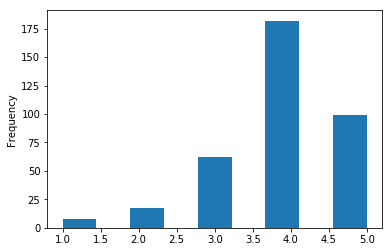

In [58]:
stud_math.famrel=stud_math.famrel.apply(
    lambda x: 1 if x==-1 else x)

stud_math.famrel.plot(kind='hist', bins=9)

### Большинство учеников имеют хорошие отношения в семье. При этом количество пропущенных значений составляет  7% от общего количества наблюдений. Отсутсвующие значения заменим величиной 4.

In [59]:
stud_math.famrel=stud_math.famrel.apply(
    lambda x: 4 if pd.isnull(x) else x)

## Распределение баллов в зависимости от качества отношений в семье.

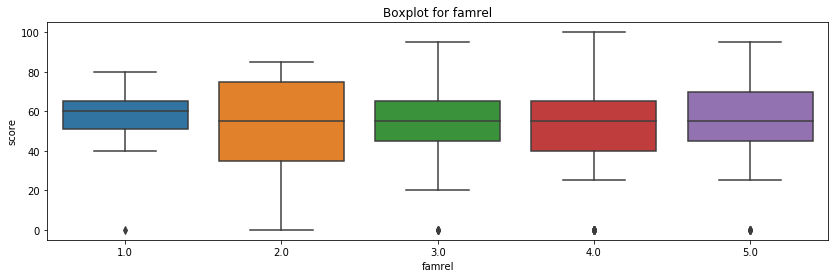

In [60]:
get_boxplot('famrel')

### Качество семейных отношений не влияет на количество полученных баллов.

# 3.15 freetime

Кол-во наблюдений: 395 
 Кол-во значений: 
 3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64 
 Кол-во пропущенных значений: 11 
 Пропорция пропущенных значений: 0.03


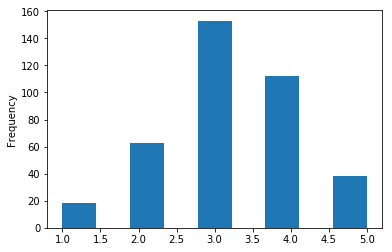

In [61]:
null_count(stud_math.freetime)
stud_math.freetime.plot(kind='hist', bins=9)

### Зависимость количества учеников от свободного времени распределена нормально. При этом количество пропущенных значений составляет  3% от общего количества наблюдений. Отсутсвующие значения заменим случайными величинами 2, 3 или 4.

In [62]:
stud_math.freetime=stud_math.freetime.apply(
    lambda x: np.random.choice([2,3,4]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от количества свободного времени.

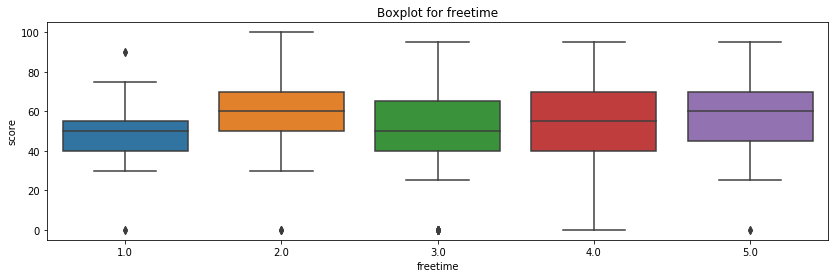

In [63]:
get_boxplot('freetime')

### Количество баллов уменьшается с уменьшением количества свободного времени.

# 3.16 goout

Кол-во наблюдений: 395 
 Кол-во значений: 
 3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64 
 Кол-во пропущенных значений: 8 
 Пропорция пропущенных значений: 0.02


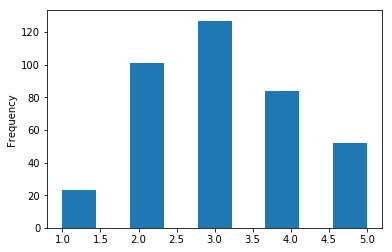

In [64]:
null_count(stud_math.goout)
stud_math.goout.plot(kind='hist', bins=9)

### Зависимость количества учеников от времени, проводимого с друзьями, распределена нормально. При этом количество пропущенных значений составляет  2% от общего количества наблюдений. Отсутсвующие значения заменим случайными величинами 2, 3 или 4.

In [65]:
stud_math.goout=stud_math.goout.apply(
    lambda x: np.random.choice([2,3,4]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от количества времени, проводимого с друзьями.

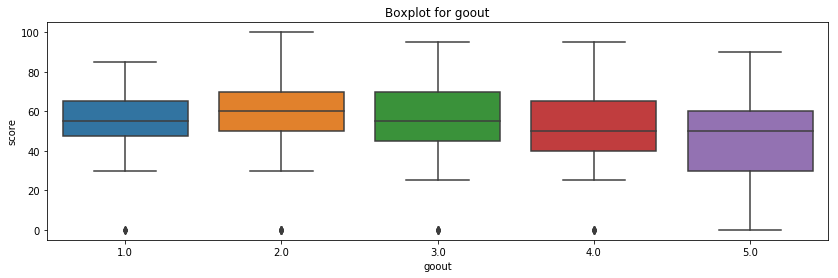

In [66]:
get_boxplot('goout')

### Количество баллов уменьшается с увеличением количества времени, проводимого с друзьями.

# 3.17 health

Кол-во наблюдений: 395 
 Кол-во значений: 
 5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64 
 Кол-во пропущенных значений: 15 
 Пропорция пропущенных значений: 0.04


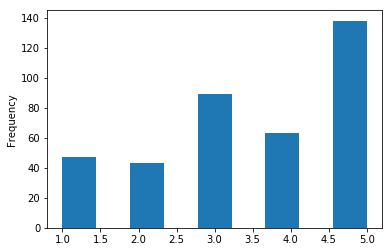

In [67]:
null_count(stud_math.health)
stud_math.health.plot(kind='hist', bins=9)

### Из графика можно сделать вывод, что большая часть учеников обладает отличным здоровьем. При этом количество пропущенных значений составляет  4% от общего количества наблюдений. Отсутсвующие значения заменим случайными величинами 3 или 5.

In [68]:
stud_math.health=stud_math.health.apply(
    lambda x: np.random.choice([3,5]) if pd.isnull(x) else x)

# Распределение баллов в зависимости от состояния здоровья.

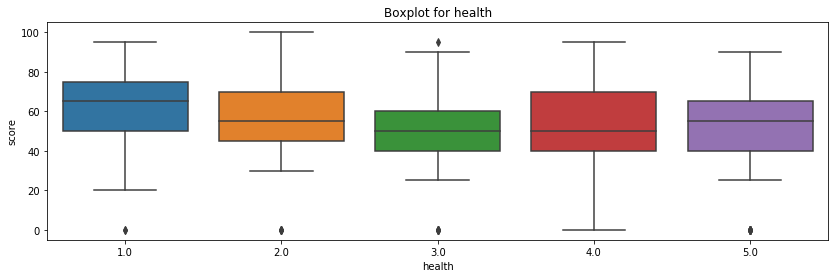

In [69]:
get_boxplot('health')

### Количество баллов уменьшается с улучшением состояния здоровья.

# 3.18 internet

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    305
0.0     56
Name: internet, dtype: int64 
 Кол-во пропущенных значений: 34 
 Пропорция пропущенных значений: 0.09


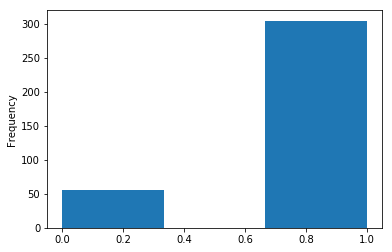

In [70]:
null_count(stud_math.internet)
stud_math.internet.plot(kind='hist', bins=3)

### У большинства учеников дома есть интернет. При этом количество пропущенных значений составляет  9% от общего количества наблюдений. Отсутсвующие значения заменим величиной 1.

In [71]:
stud_math.internet=stud_math.internet.apply(
    lambda x: 1 if pd.isnull(x) else x)

## Распределение баллов в зависимости от наличия интернета дома.

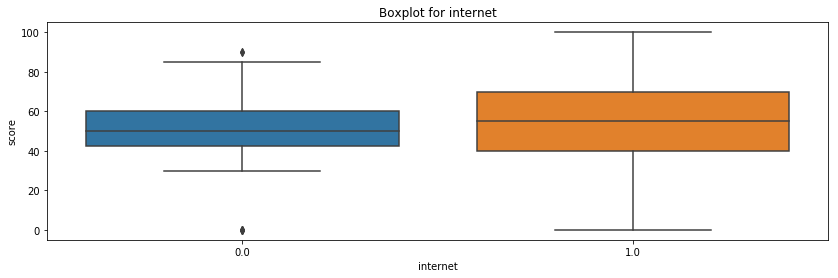

In [72]:
get_boxplot('internet')

### Из графика видно, что наличие интернета благоприятно сказывается на количестве баллов.

# 3.19 romantic

Кол-во наблюдений: 395 
 Кол-во значений: 
 0.0    240
1.0    124
Name: romantic, dtype: int64 
 Кол-во пропущенных значений: 31 
 Пропорция пропущенных значений: 0.08


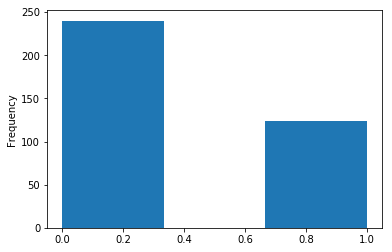

In [73]:
null_count(stud_math.romantic)
stud_math.romantic.plot(kind='hist', bins=3)

### У большинства учеников нет романтических отношений. При этом количество пропущенных значений составляет  8% от общего количества наблюдений. Отсутсвующие значения заменим случайными величинами 0 или 1.

In [74]:
stud_math.romantic=stud_math.romantic.apply(
    lambda x: np.random.choice([0,1]) if pd.isnull(x) else x)

## Распределение баллов в зависимости от наличия романтических отношений.

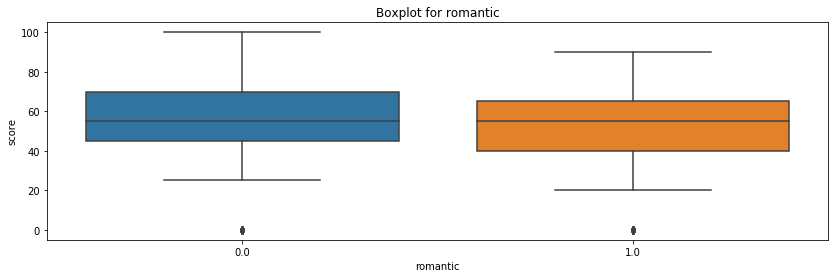

In [75]:
get_boxplot('romantic')

### По графику можно сделать вывод, что наличие романтических отношений не сказывается на количестве баллов.

# 3.20 Pstatus

Кол-во наблюдений: 395 
 Кол-во значений: 
 1.0    314
0.0     36
Name: p_together, dtype: int64 
 Кол-во пропущенных значений: 45 
 Пропорция пропущенных значений: 0.11


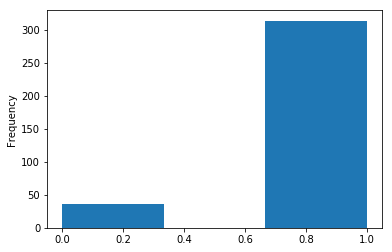

In [76]:
null_count(stud_math.p_together)
stud_math.p_together.plot(kind='hist', bins=3)

### У большинства учеников родители живут вместе. При этом количество пропущенных значений составляет  11% от общего количества наблюдений. Отсутсвующие значения заменим величиной 1.

In [77]:
stud_math.p_together=stud_math.p_together.apply(
    lambda x: 1 if pd.isnull(x) else x)

## Распределение баллов в зависимости от статуса совместного проживания родителей.

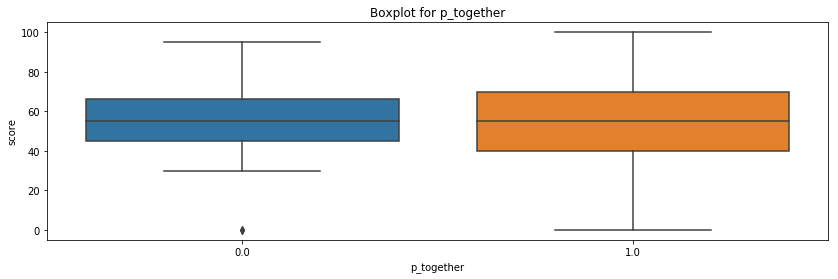

In [78]:
get_boxplot('p_together')

### Из графика можно сделать вывод, что количество баллов не зависит от статуса совместного проживания родителей ученика.

# 3.21 failures

Кол-во наблюдений: 395 
 Кол-во значений: 
 0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64 
 Кол-во пропущенных значений: 22 
 Пропорция пропущенных значений: 0.06


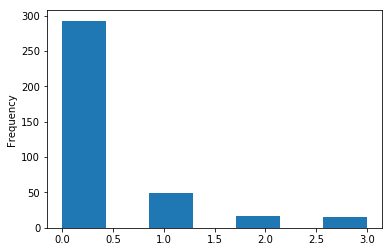

In [79]:
null_count(stud_math.failures)
stud_math.failures.plot(kind='hist', bins=7)

### По графику видно, что большинство учеников имеют значение параметра 0, неучтенное в условии. Т.к. у данного значения нет описания, удалим параметр. 

In [80]:
stud_math = stud_math.drop('failures', axis=1)

# 3.22 studytime, granular

In [81]:
stud_math.corr().head(13)

,school,age,city_dweller,famsize_GT3,p_together,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
school,1.000000,-0.377610,0.305692,0.062853,-0.060121,0.136125,0.085554,-0.057506,0.038044,-0.122641,-0.005995,-0.235955,0.092290,0.139789,0.176980,0.021922,0.103007,0.094709,-0.092700,0.029040,0.101331,-0.077485,0.032196,-0.037919,0.005508,0.043373,-0.013642,0.044524
age,-0.377610,1.000000,-0.169080,-0.020143,0.014241,-0.160777,-0.161226,0.103118,0.059735,0.015747,0.221920,0.066337,-0.015355,-0.251811,-0.142751,-0.011339,-0.093918,-0.094359,0.015556,-0.202123,-0.102582,0.122642,0.065250,0.021560,0.126082,-0.066136,0.093592,-0.155726
city_dweller,0.305692,-0.169080,1.000000,-0.059301,-0.060489,0.158211,0.081532,-0.089824,-0.020135,-0.123932,0.079618,-0.265041,-0.056920,0.038486,0.065996,0.050647,-0.037064,0.042941,0.057155,0.053417,0.190066,-0.006656,-0.032190,0.050608,0.076960,-0.035840,0.024930,0.106616
famsize_GT3,0.062853,-0.020143,-0.059301,1.000000,0.064290,0.048075,0.069650,0.106412,-0.037621,0.001024,0.041708,-0.025505,0.075610,0.030837,0.081813,0.050516,0.030986,-0.091145,-0.076326,0.022713,-0.002770,0.011005,0.021649,-0.012452,-0.040508,0.039418,-0.017267,-0.064874
p_together,-0.060121,0.014241,-0.060489,0.064290,1.000000,-0.125450,-0.068189,-0.008807,0.039720,0.050296,0.013582,0.053295,0.003874,-0.035463,-0.020295,0.052227,0.112800,-0.070371,-0.004138,-0.030077,0.047818,-0.041201,0.010964,0.044649,0.021686,0.000321,-0.106116,-0.040135
Medu,0.136125,-0.160777,0.158211,0.048075,-0.125450,1.000000,0.578412,-0.498522,-0.212752,-0.016816,-0.127960,-0.177285,0.073607,-0.032554,0.159243,0.139668,0.094943,0.178702,-0.074156,0.155501,0.188607,0.012875,-0.013366,0.028360,0.078644,-0.058350,-0.013124,0.200890
Fedu,0.085554,-0.161226,0.081532,0.069650,-0.068189,0.578412,1.000000,-0.314409,-0.329306,-0.009042,-0.008942,-0.134908,0.003509,0.053327,0.167557,0.096895,0.091880,0.127215,-0.003472,0.172494,0.113236,0.013157,-0.019166,-0.015218,0.056407,0.029257,0.019793,0.114630
Mjob,-0.057506,0.103118,-0.089824,0.106412,-0.008807,-0.498522,-0.314409,1.000000,0.260759,-0.080277,0.131867,0.115105,0.015671,0.089475,-0.121520,-0.168140,-0.112849,-0.131461,-0.015634,-0.060488,-0.129473,0.059093,0.055484,-0.070006,-0.032729,-0.044962,-0.012354,-0.125100
Fjob,0.038044,0.059735,-0.020135,-0.037621,0.039720,-0.212752,-0.329306,0.260759,1.000000,-0.116344,-0.046341,0.100231,-0.004928,-0.087395,-0.062098,0.034179,-0.014662,-0.077684,0.005326,0.026153,-0.053013,-0.055479,0.051291,0.024551,-0.004445,-0.007989,-0.117051,-0.073126
reason,-0.122641,0.015747,-0.123932,0.001024,0.050296,-0.016816,-0.009042,-0.080277,-0.116344,1.000000,-0.131638,0.090658,-0.069580,-0.003371,-0.082197,-0.128064,-0.006263,-0.047561,0.070012,-0.135799,-0.047387,0.006293,0.013734,0.111751,0.014770,0.091611,0.050833,0.019642


### Так как коэффициент корреляции параметров "studytime" и "studytime, granular" равен -1, удалим параметр "studytime, granular".

In [82]:
stud_math = stud_math.drop('studytime, granular', axis=1)

# 3.23 absences

Кол-во наблюдений: 395 
 Кол-во значений: 
 0.0      111
2.0       60
4.0       53
6.0       31
8.0       21
10.0      17
12.0      12
14.0      12
3.0        8
16.0       7
7.0        6
5.0        5
18.0       5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64 
 Кол-во пропущенных значений: 12 
 Пропорция пропущенных значений: 0.03


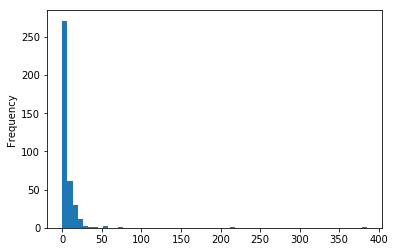

In [83]:
null_count(stud_math.absences)
stud_math.absences.plot(kind='hist',bins=60)

### Среди значений параметра есть похожие на ошибки: 385 и 212.

In [84]:
stud_math.absences=stud_math.absences.apply(lambda x: 0 if pd.isnull(x) else x)
stud_math=stud_math[stud_math.absences<212]

# 3.24 score 

Кол-во наблюдений: 393 
 Кол-во значений: 
 50.0     54
55.0     46
0.0      37
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     26
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64 
 Кол-во пропущенных значений: 6 
 Пропорция пропущенных значений: 0.02


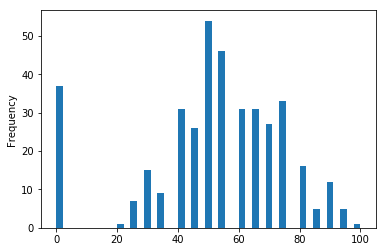

In [85]:
null_count(stud_math.score)
stud_math.score.plot(kind='hist',bins=45)

### Количество пропущенных значений составляет  2% от общего количества наблюдений.

In [86]:
stud_math.score=stud_math.score.apply(lambda x : 50 if pd.isnull(x) else x)
stud_math.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 28 columns):
school          393 non-null int64
sex             393 non-null object
age             393 non-null int64
city_dweller    393 non-null float64
famsize_GT3     393 non-null float64
p_together      393 non-null float64
Medu            393 non-null float64
Fedu            393 non-null float64
Mjob            393 non-null float64
Fjob            393 non-null float64
reason          393 non-null float64
guardian        393 non-null float64
traveltime      393 non-null float64
studytime       393 non-null float64
schoolsup       393 non-null float64
famsup          393 non-null float64
paid            393 non-null float64
activities      393 non-null float64
nursery         393 non-null float64
higher          393 non-null float64
internet        393 non-null float64
romantic        393 non-null float64
famrel          393 non-null float64
freetime        393 non-null float64
goout       

In [88]:
def get_stat_dif(column):
    cols=stud_math.loc[:,column].value_counts().index
    combinations_all=list(combinations(cols,2))
    for comb in combinations_all:
        if ttest_ind(stud_math.loc[stud_math.loc[:,column]==comb[0],'score'],
                    stud_math.loc[stud_math.loc[:,column]==comb[1],'score']).pvalue \
            <=0.05/len(combinations_all):
            print('Найдены статистические значимые различия для оценки', column)
            break
for col in ['school','sex','age','city_dweller','famsize_GT3',
            'p_together','Medu','Fedu','Mjob','Fjob','reason',
            'guardian','traveltime','studytime','schoolsup',
            'famsup','paid','activities','nursery','higher',
            'internet','romantic','famrel','freetime','goout',
            'health','absences']:
    get_stat_dif(col)
stud_math_for_model = stud_math.loc[:,['sex','city_dweller',
                               'Medu','Mjob','higher',
                               'romantic','goout']]
stud_math_for_model.head()

Найдены статистические значимые различия для оценки sex
Найдены статистические значимые различия для оценки city_dweller
Найдены статистические значимые различия для оценки Medu
Найдены статистические значимые различия для оценки Mjob
Найдены статистические значимые различия для оценки higher
Найдены статистические значимые различия для оценки romantic


,sex,city_dweller,Medu,Mjob,higher,romantic,goout
0,F,1.0,4.0,3.0,1.0,0.0,4.0
1,F,1.0,1.0,3.0,1.0,0.0,3.0
2,F,1.0,1.0,3.0,1.0,0.0,2.0
3,F,1.0,4.0,1.0,1.0,1.0,2.0
4,F,1.0,3.0,4.0,1.0,0.0,2.0
